### Data Analysis
This project will use a datast downloaded from the cryptodownload page https://www.cryptodatadownload.com/data/bitstamp/. The employed Dataset includes information from the data set include the following elements from 2016 to 2024:
* Unix Timestamp - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
* Date - This timestamp is converted to NY EST Standard Time
* Symbol - The symbol for which the timeseries data refers
* Open - This is the opening price of the time period
* High - This is the highest price of the time period
* Low - This is the lowest price of the time period
* Close - This is the closing price of the time period
* Volume (Crypto) - This is the volume in the transacted Ccy. Ie. For BTC/USDT, * this is in BTC amount
* Volume Base Ccy - This is the volume in the base/converted ccy. Ie. For BTC/USDT, this is in USDT amount

Bitcoin Prediction Price - Dataset Analysis

Bitcoin Prediction Price - Dataset Analysis
This project will use a datast downloaded from the cryptodownload page https://www.cryptodatadownload.com/data/bitstamp/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
#Read Dataset and skip the first row that has the url and no data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ZoomCamp/Projects/Capstone 2/BTCEUR.csv",skiprows=[0])


In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
df = df[::-1] #revert the order of the df so the oldest values appear first
df = df.reset_index(drop = True)

In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,volume_btc,volume_eur
0,1464998400,2016-06-04 00:00:00,BTC/EUR,503.01,507.33,490.00,503.00,83059.64,166.86
1,1465084800,2016-06-05 00:00:00,BTC/EUR,502.46,510.13,496.93,505.98,108418.34,214.99
2,1465171200,2016-06-06 00:00:00,BTC/EUR,505.97,515.00,501.85,514.23,204665.56,399.86
3,1465257600,2016-06-07 00:00:00,BTC/EUR,514.59,520.00,492.02,507.94,329572.15,645.30
4,1465344000,2016-06-08 00:00:00,BTC/EUR,507.99,515.00,502.64,513.00,285741.16,561.08


In [ ]:
df.tail()

,unix,date,symbol,open,high,low,close,volume_btc,volume_eur
2770,1704326400,2024-01-04 00:00:00,BTC/EUR,39335.0,40955.0,38982.0,40415.0,575.646289,2.326474e+07
2771,1704412800,2024-01-05 00:00:00,BTC/EUR,40403.0,40665.0,38800.0,40429.0,1073.614052,4.340514e+07
2772,1704499200,2024-01-06 00:00:00,BTC/EUR,40423.0,40478.0,39750.0,40262.0,200.282240,8.063764e+06
2773,1704585600,2024-01-07 00:00:00,BTC/EUR,40249.0,40731.0,39932.0,40185.0,288.566450,1.159604e+07
2774,1704672000,2024-01-08 00:00:00,BTC/EUR,40196.0,40234.0,40150.0,40234.0,1.099202,4.422530e+04


To know more about the values we are working with, I will proceed to plot the values of Bitcoin agains time

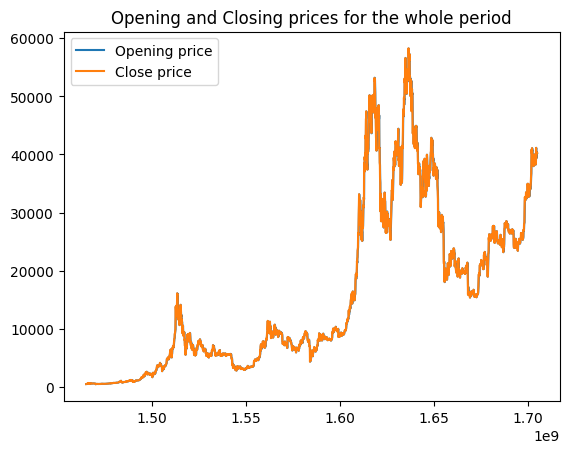

In [ ]:
plt.plot(df.unix.values, df.open.values, label="Opening price")
plt.plot(df.unix.values, df.close.values, label="Close price")
plt.title('Opening and Closing prices for the whole period')
plt.legend()
plt.show()

Just for the sake of vizualization, I will plot the price frecuency:

<Axes: xlabel='close', ylabel='Count'>

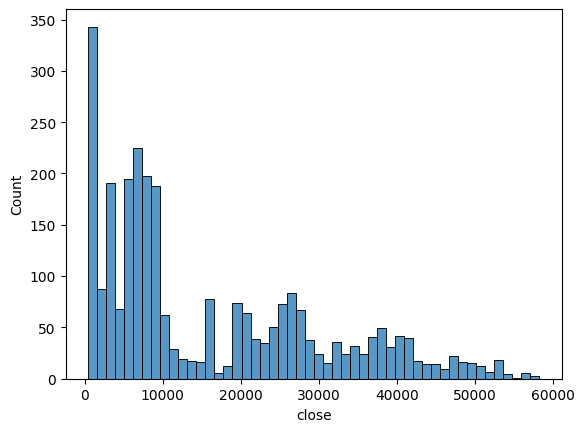

In [ ]:
sns.histplot(df.close, bins=50)

As you can see, the value frequency does not have a direct colletion to latelest pices, so it is not the main point of the prediction

As the opening and close prices show no visible difference when the  graphic for the whole data is shown
To get a better idea on how it impacts, a shorter range of 100 days it taken and analyse it.

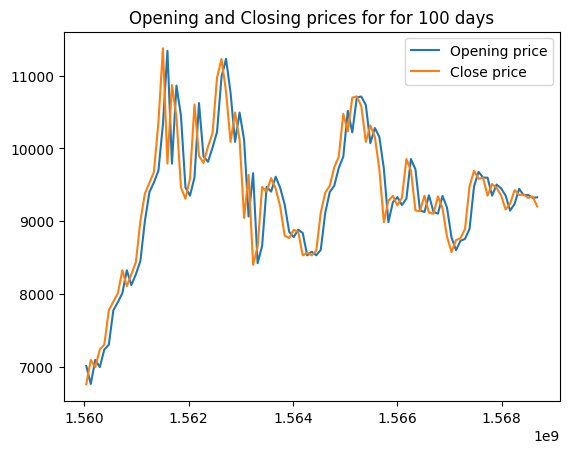

In [ ]:
plt.plot(df.loc[1100:1200, 'unix'].values, df.loc[1100:1200, 'open'].values, label="Opening price")
plt.plot(df.loc[1100:1200, 'unix'].values, df.loc[1100:1200, 'close'].values, label="Close price")
plt.title('Opening and Closing prices for for 100 days')
plt.legend()
plt.show()

<Axes: ylabel='Count'>

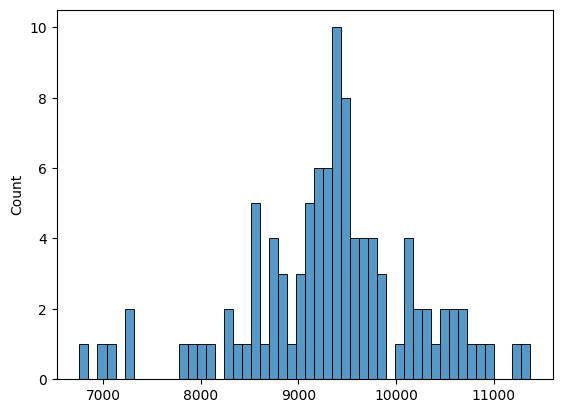

In [ ]:
sns.histplot(df.loc[1100:1200, 'close'].values, bins=50)

<Axes: ylabel='Count'>

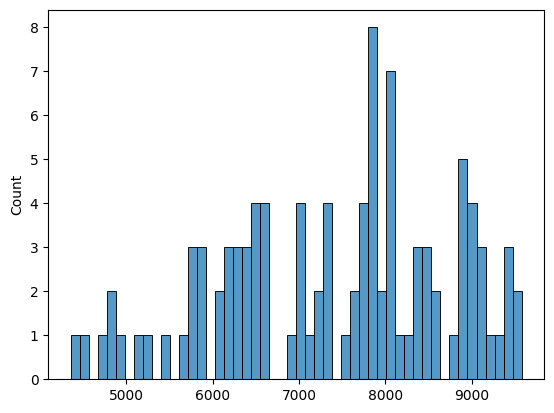

In [ ]:
sns.histplot(df.loc[1300:1400, 'close'].values, bins=50)

## Data Engineering
As the Bitcoin price could be quite volatile, to improve price prediction the following values will be calulated and used to predict the Price:
- Daily mean
- 3 Days mean
- 7 Days tendency line slope
- 30 Days tendency line slope
- 90 Days tendency line slope

The Reason for this new calculated valuear are the following one:
* The daily mean and the 3 days mean had as objective to smoth the curve and lower the fluctations due to bitcoin inestability. A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles, but selecting the number of 3 days and not 4 or 5 was more a rule of thump than an specific reason
* The tenency lines slops is to fill the ML algorithm with information on how was doing the price on the days before the prediction day. This is important, as this information give context on how the tendency is without recurreying to complex methods like recurrent neural networks or Time Series Trees. This is to lower computationla consuption and time of more complex models in exchange of, maybe, lower accuracy.

In [ ]:
df["daily_mean"] = np.round((df["open"]+df["close"])/2, 0)

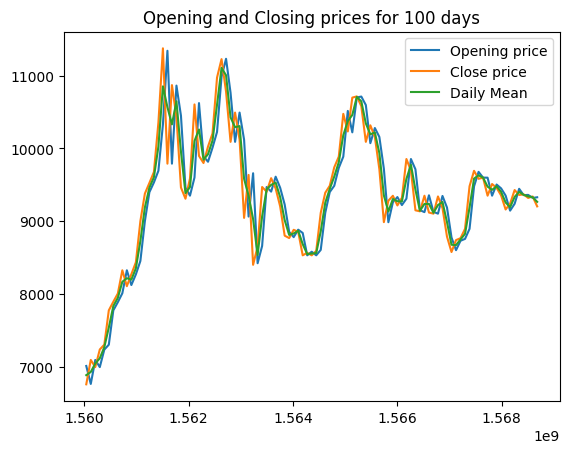

In [ ]:
plt.plot(df.loc[1100:1200, 'unix'].values, df.loc[1100:1200, 'open'].values, label="Opening price")
plt.plot(df.loc[1100:1200, 'unix'].values, df.loc[1100:1200, 'close'].values, label="Close price")
plt.plot(df.loc[1100:1200, 'unix'].values, df.loc[1100:1200, 'daily_mean'].values, label="Daily Mean")
plt.title('Opening and Closing prices for 100 days')
plt.legend()
plt.show()

In [ ]:
df['3_day_mean'] = np.round(df['daily_mean'].rolling(window=3, center=True).mean(), 0)
df.drop(df.index[0], inplace=True)
df.drop(df.index[-1], inplace=True)
df = df.reset_index(drop = True)

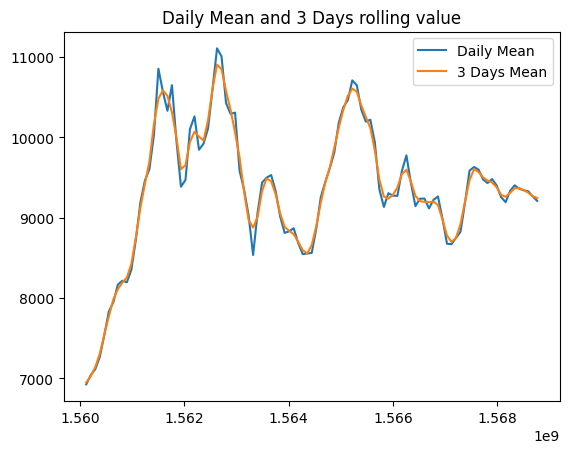

In [ ]:
plt.plot(df.loc[1100:1200, 'unix'].values, df.loc[1100:1200, 'daily_mean'].values, label="Daily Mean")
plt.plot(df.loc[1100:1200, 'unix'].values, df.loc[1100:1200, '3_day_mean'].values, label="3 Days Mean")
plt.title('Daily Mean and 3 Days rolling value')
plt.legend()
plt.show()

In [ ]:
def tendency_slope(days, df):
  # Row at wich the calculation starts
  start_row = days+1

  # Create columns 'X_days_a' where X is the days to use for calculation and a is the slope coeficient in the tendency line
  df[str(days)+'_days_a'] = 0.0

  # Calculate coefficients for the linear regression model
  for i in range(start_row, len(df)):
      X = np.arange(1, start_row).reshape(-1, 1)
      y = df['open'].iloc[i - days : i].values.reshape(-1, 1)

      # Fit linear regression model
      model = LinearRegression().fit(X, y)

      # Assign coefficients to the DataFrame
      df.at[i, str(days)+'_days_a'] = np.round(model.coef_[0][0], 2)


In [ ]:
tendency_slope(7, df)
tendency_slope(30, df)
tendency_slope(90, df)

In [ ]:
df

,unix,date,symbol,open,high,low,close,volume_btc,volume_eur,daily_mean,3_day_mean,7_days_a,30_days_a,90_days_a
0,1465084800,2016-06-05 00:00:00,BTC/EUR,502.46,510.13,496.93,505.98,108418.340000,2.149900e+02,504.0,506.0,0.00,0.00,0.00
1,1465171200,2016-06-06 00:00:00,BTC/EUR,505.97,515.00,501.85,514.23,204665.560000,3.998600e+02,510.0,508.0,0.00,0.00,0.00
2,1465257600,2016-06-07 00:00:00,BTC/EUR,514.59,520.00,492.02,507.94,329572.150000,6.453000e+02,511.0,510.0,0.00,0.00,0.00
3,1465344000,2016-06-08 00:00:00,BTC/EUR,507.99,515.00,502.64,513.00,285741.160000,5.610800e+02,510.0,510.0,0.00,0.00,0.00
4,1465430400,2016-06-09 00:00:00,BTC/EUR,511.23,514.87,505.90,509.20,168570.960000,3.308100e+02,510.0,511.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,1704240000,2024-01-03 00:00:00,BTC/EUR,41132.00,41606.00,38000.00,39323.00,749.173879,2.945976e+07,40228.0,40234.0,105.86,-24.46,169.47
2769,1704326400,2024-01-04 00:00:00,BTC/EUR,39335.00,40955.00,38982.00,40415.00,575.646289,2.326474e+07,39875.0,40173.0,330.64,-29.58,169.06
2770,1704412800,2024-01-05 00:00:00,BTC/EUR,40403.00,40665.00,38800.00,40429.00,1073.614052,4.340514e+07,40416.0,40211.0,359.04,-34.35,166.76
2771,1704499200,2024-01-06 00:00:00,BTC/EUR,40423.00,40478.00,39750.00,40262.00,200.282240,8.063764e+06,40342.0,40325.0,404.39,-18.13,165.33


As it can be seen in the first values, there is no tendency slope value for the first days, so to have a fully working dataframe we would need to remove values with no tendency coeffiients and left only the values needed, reducing the valid rows from 2773 to 1683 values

In [ ]:
df = df.drop(df.index[:91])
df = df.reset_index(drop = True)

Now I will add the target value to the Dataset, that is the next 3 days rolling value

To know more about the impact of this values regarding the bitcoin value, I have devided the tendency values by the 3 days rolling value for that day. In this way, we can see if this value has keep in the same range regarding the price or bitcoin or not

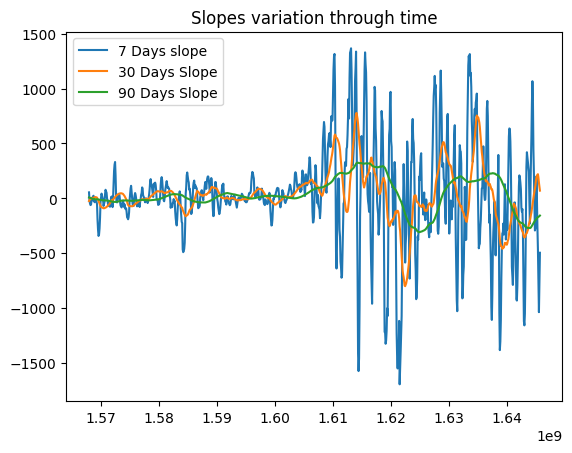

In [ ]:
plt.plot(df.loc[1100:2000, 'unix'].values, df.loc[1100:2000, '7_days_a'].values, label="7 Days slope")
plt.plot(df.loc[1100:2000, 'unix'].values, df.loc[1100:2000, '30_days_a'].values, label="30 Days Slope")
plt.plot(df.loc[1100:2000, 'unix'].values, df.loc[1100:2000, '90_days_a'].values, label="90 Days Slope")
plt.title('Slopes variation through time')
plt.legend()
plt.show()

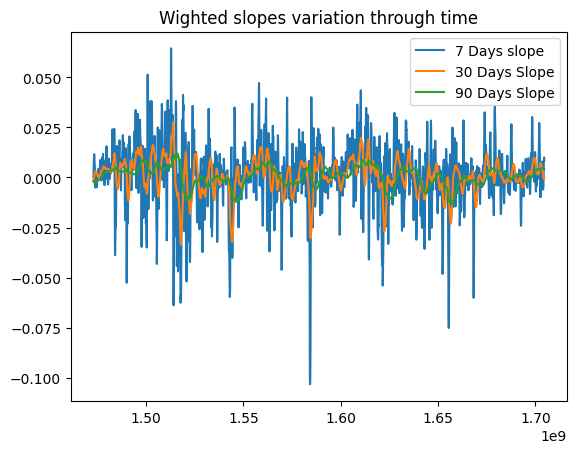

In [ ]:
plt.plot(df.loc[:, 'unix'].values, (df.loc[:, '7_days_a'].values / df.loc[:, '3_day_mean'].values), label="7 Days slope")
plt.plot(df.loc[:, 'unix'].values, (df.loc[:, '30_days_a'].values / df.loc[:, '3_day_mean'].values), label="30 Days Slope")
plt.plot(df.loc[:, 'unix'].values, (df.loc[:, '90_days_a'].values / df.loc[:, '3_day_mean'].values), label="90 Days Slope")
plt.title('Wighted slopes variation through time')
plt.legend()
plt.show()

As evident from the data, the slopes of the trend lines, weighted by the value of Bitcoin, have been oscillating within a specific range. This characteristic could render these trend lines as a valuable means to incorporate recent history into simple prediction models

In [ ]:
df

,unix,date,symbol,open,high,low,close,volume_btc,volume_eur,daily_mean,3_day_mean,7_days_a,30_days_a,90_days_a
0,1472947200,2016-09-04 00:00:00,BTC/EUR,532.05,545.00,530.69,534.44,83410.070000,1.548400e+02,533.0,532.0,0.12,-0.69,-1.06
1,1473033600,2016-09-05 00:00:00,BTC/EUR,537.83,540.00,520.00,539.89,194358.240000,3.623700e+02,539.0,538.0,1.85,-0.57,-1.13
2,1473120000,2016-09-06 00:00:00,BTC/EUR,539.26,548.64,530.14,542.80,204407.280000,3.775400e+02,541.0,542.0,3.84,-0.40,-1.19
3,1473206400,2016-09-07 00:00:00,BTC/EUR,542.80,548.60,536.94,547.66,193789.480000,3.560500e+02,545.0,546.0,5.10,-0.17,-1.25
4,1473292800,2016-09-08 00:00:00,BTC/EUR,547.69,559.00,544.21,555.99,234580.430000,4.229100e+02,552.0,551.0,6.09,0.11,-1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,1704240000,2024-01-03 00:00:00,BTC/EUR,41132.00,41606.00,38000.00,39323.00,749.173879,2.945976e+07,40228.0,40234.0,105.86,-24.46,169.47
2678,1704326400,2024-01-04 00:00:00,BTC/EUR,39335.00,40955.00,38982.00,40415.00,575.646289,2.326474e+07,39875.0,40173.0,330.64,-29.58,169.06
2679,1704412800,2024-01-05 00:00:00,BTC/EUR,40403.00,40665.00,38800.00,40429.00,1073.614052,4.340514e+07,40416.0,40211.0,359.04,-34.35,166.76
2680,1704499200,2024-01-06 00:00:00,BTC/EUR,40423.00,40478.00,39750.00,40262.00,200.282240,8.063764e+06,40342.0,40325.0,404.39,-18.13,165.33


Correlation fo variables

Fist we have to set the value that we will predict, in this case, I would take the 3 days rolling value. This probably would not be a good idea, as it may cause overfitting, but for the sake of science doing a quick check

In [ ]:
df['next_day_value'] = df['3_day_mean'].shift(-1)
df['next_week_value'] = df['3_day_mean'].shift(-7)
df.drop(df.index[-7:], inplace=True)
df = df.reset_index(drop = True)

In [ ]:
features = df.columns.values
features = features[:-2]
features

array(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close',
       'volume_btc', 'volume_eur', 'daily_mean', '3_day_mean', '7_days_a',
       '30_days_a', '90_days_a'], dtype=object)

In [ ]:
print("Correlation with Next Value")
cor = df[features].corrwith(df["next_day_value"]).abs().sort_values(ascending=False)
print(cor)

Correlation with Next Value
3_day_mean    0.999624
close         0.999572
daily_mean    0.999475
high          0.999198
low           0.998909
open          0.998677
unix          0.746235
volume_eur    0.516024
90_days_a     0.291893
30_days_a     0.165350
volume_btc    0.120778
7_days_a      0.078003
dtype: float64


<ipython-input-25-01617258a739>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df[features].corrwith(df["next_day_value"]).abs().sort_values(ascending=False)


In [ ]:
print("Correlation with Next Week Value")
cor = df[features].corrwith(df["next_week_value"]).abs().sort_values(ascending=False)
print(cor)

Correlation with Next Week Value
close         0.991396
3_day_mean    0.991376
daily_mean    0.990991
high          0.990827
low           0.990475
open          0.989890
unix          0.747108
volume_eur    0.512807
90_days_a     0.296583
30_days_a     0.173584
volume_btc    0.121320
7_days_a      0.080636
dtype: float64


<ipython-input-26-9375c35876b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df[features].corrwith(df["next_week_value"]).abs().sort_values(ascending=False)


As it can be seend the 3 days rolloing mean and the daily mean are very closely linked to the next value. This is because the next value contains te 3 day mean value and the daily value. To avoid this I will take just the daily value as next value to predict

In [ ]:
df['next_day_value'] = df['daily_mean'].shift(-1)
df['next_week_value'] = df['daily_mean'].shift(-7)
df.drop(df.index[-7:], inplace=True)
df = df.reset_index(drop = True)

In [ ]:
  print("Correlation with Next Value")
  cor = df[features].corrwith(df["next_day_value"]).abs().sort_values(ascending=False)
  print(cor)

Correlation with Next Value
close         0.999647
3_day_mean    0.999473
daily_mean    0.999319
high          0.999037
low           0.998805
open          0.998286
unix          0.744139
volume_eur    0.518354
90_days_a     0.286852
30_days_a     0.162809
volume_btc    0.120283
7_days_a      0.079402
dtype: float64


<ipython-input-28-01617258a739>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df[features].corrwith(df["next_day_value"]).abs().sort_values(ascending=False)


In [ ]:
  print("Correlation with Next Week Value")
  cor = df[features].corrwith(df["next_week_value"]).abs().sort_values(ascending=False)
  print(cor)

Correlation with Next Week Value
close         0.990957
3_day_mean    0.990941
daily_mean    0.990541
high          0.990383
low           0.990035
open          0.989425
unix          0.744901
volume_eur    0.515836
90_days_a     0.291306
30_days_a     0.170958
volume_btc    0.120739
7_days_a      0.082144
dtype: float64


<ipython-input-29-9375c35876b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df[features].corrwith(df["next_week_value"]).abs().sort_values(ascending=False)


From this Analysis, we can take the following conclusions:
* As expected, the previous date values are strongly related to the next day value. As the correlation is too strong, a value for the next week (7 days later) was included that was not originally in this analisys, as next day prediction may not be a predictable value
* If we are trying to predict a value, for the next 24 hours, then the opening value should be taken, that is the value that has a lower correlation with the next day value
* The Unix time value has a huge correlation with the Bitcoint price, that is probably due to the fact that the price has only increased though time. This is not needed to be true on the long run, so the unix value will be discarded for the prediction, as I would like to create a predictor that take into account only the short term tendency
* The volumne of Euros traded is more important than the volumen of Bitcoin moved. This could look auntitive, but as bitcoin volume decrease with incremente of the price, and the value is in Euros, then is easier to get a correlation with the Euros value
* For the tendency lines slopes, the more important is the one for 90 days, then 30 dyas, and then 7 days. This shows the importance of the tendency on long times is more consistent that in short time. Anyway, for this project the 3 valuse will be keep
* The high values of correlation between prices shows that the price perdiction will be a hard task and probably not possible. Probably calculation the price for the next 3 days, or the next week would be a beter experiment to run. In case of the values overfitting, predict the values for the next week will be attempt


For the final data set I will remove the following columns that will not be used for price prediction:
* date
* symbol
* high
* low
* close
* daily_mean
* 3_day_mean


                                          

In [ ]:
df_final= df.copy()
del df_final["date"]
del df_final["symbol"]
del df_final["high"]
del df_final["low"]
del df_final["close"]
del df_final["daily_mean"]
del df_final["3_day_mean"]

In [ ]:
df_final

,unix,open,volume_btc,volume_eur,7_days_a,30_days_a,90_days_a,next_day_value,next_week_value
0,1472947200,532.05,83410.070000,1.548400e+02,0.12,-0.69,-1.06,539.0,548.0
1,1473033600,537.83,194358.240000,3.623700e+02,1.85,-0.57,-1.13,541.0,543.0
2,1473120000,539.26,204407.280000,3.775400e+02,3.84,-0.40,-1.19,545.0,543.0
3,1473206400,542.80,193789.480000,3.560500e+02,5.10,-0.17,-1.25,552.0,543.0
4,1473292800,547.69,234580.430000,4.229100e+02,6.09,0.11,-1.31,556.0,543.0
...,...,...,...,...,...,...,...,...,...
2663,1703030400,38515.00,527.531216,2.104217e+07,-47.00,245.15,183.70,39883.0,38835.0
2664,1703116800,39891.00,388.639180,1.549699e+07,-123.11,235.62,183.82,39930.0,38835.0
2665,1703203200,39875.00,304.359594,1.216951e+07,88.04,232.69,184.32,39907.0,38372.0
2666,1703289600,40000.00,115.594063,4.602262e+06,242.11,216.90,184.60,39514.0,38264.0


In [ ]:
df_final.to_csv('BCP_extended_dataframe.csv', index=False)

In [ ]:
check = ((df_final["next_week_value"]-df_final["open"])/df_final["next_week_value"]*100)
check.mean()

0.6652454059059094

In [ ]:
check.std()

10.627973899220493